# PyCaret - Tutorial de Classificação Binária

## Instalação do PyCaret

In [ ]:
!pip install pycaret

Se você estiver executando este bloco no Google colab, execute o seguinte código na parte superior de seu bloco de notas para exibir visuais interativos.

In [ ]:
import numpy as np
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


# O que é uma classificação Multiclasses?

A classificação multiclasse é uma técnica de aprendizado de máquina supervisionada em que o objetivo é classificar as instâncias em uma de três ou mais classes. (Classificar instâncias em uma das duas classes é chamado de Classificação Binária). A classificação multiclasse não deve ser confundida com a classificação multi-rótulo, onde vários rótulos devem ser previstos para cada instância.


Para este tutorial, usaremos o conjunto de dados Iris da UCI. Este é talvez o banco de dados mais conhecido que pode ser encontrado na literatura de reconhecimento de padrões. O conjunto de dados contém 3 classes de 50 instâncias cada, onde cada classe se refere a um tipo de planta de íris. As descrições curtas de cada coluna são as seguintes:


*   sepal_length: Comprimento da sépala
*   sepal_width: Largura do Sepal
*   petal_length: Comprimento da pétala
*   petal_width: largura da pétala
*   species: Uma de três classes (Setosa, Versicolour, Virginica) Coluna Alvo


# Importando as bases existentes

In [ ]:
from pycaret.datasets import get_data
todas_bases = get_data('index')

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,None,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,None,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,None,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,None,683,10,N
6,credit,Multivariate,Classification (Binary),default,None,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,None,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,None,10000,14,N
9,employee,Multivariate,Classification (Binary),left,None,14999,10,N


Selecionando a base de dados Iris

In [ ]:
dataset = get_data('iris')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Consultando outras bases

In [ ]:
wiki = get_data('wikipedia')

,Title,Category,Text
0,Apple Inc.,Information Technology,nasdaq 100 component s p 500 component founda...
1,than the previous version and minor positionin...,NaN,NaN
2,the life and times of macintosh the computer ...,NaN,NaN
3,Adobe Systems,Information Technology,br nasdaq 100 nasdaq 100 component br s p 500...
4,General Motors,Consumer Discretionary,s p 500 s p 500 component industry automotive...


In [ ]:
tweets = get_data('tweets')

,id,tweet
0,2602860537,10 Things Missing In The New Twitter Interface...
1,2602850443,RT @_NATURALBWINNER OH AND I DONT LIKE THIS #N...
2,2602761852,RT @HBO24 yo the #newtwitter is better.. YUPP ...
3,2602738438,Aaaaaaaand I have the new twitter! Yay! I shou...
4,2602684185,can I please have the new twitter? #twitter #n...


In [ ]:
cancer = get_data('cancer')

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,5,1,1,1,2,1,3,1,1
1,0,5,4,4,5,7,10,3,2,1
2,0,3,1,1,1,2,2,3,1,1
3,0,6,8,8,1,3,4,3,7,1
4,0,4,1,1,3,2,1,3,1,1


Visualizando o tipo de dataset

In [ ]:
type(dataset)

pandas.core.frame.DataFrame

In [ ]:
#Checando o tamanho do dataset
dataset.shape

(150, 5)

Verificando o atributo alvo **species**, mostrando somente valores únicos

In [ ]:
dataset['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Vamos verificar quantos registros há por classe

In [ ]:
np.unique(dataset['species'], return_counts=True)

(array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object),
 array([50, 50, 50]))

Agora vamos selecionar 90% dos registros aleatoriamente para montar com conjunto de dados para realizar o treinamento.
Utilizamos **random_state=1** para que ele sempre pega os mesmos dados quando rodar de novo.

In [ ]:
base_treinamento = dataset.sample(frac=0.9, random_state=1)
base_treinamento.shape

(135, 5)

Você pode visualizar todos os índices que foram sorteados para montar a base_treinamento.

In [ ]:
base_treinamento.index

Int64Index([ 14,  98,  75,  16, 131,  56, 141,  44,  29, 120,
            ...
             81,  60,   0,   1,  57,  22,  61,  63,   7,  86],
           dtype='int64', length=135)

Para os dados de teste, vamos eliminar da base completa, os registros que pegamos para o treinamento.

In [ ]:
base_teste = dataset.drop(base_treinamento.index)
base_teste.shape

(15, 5)

Você pode visualizar todos os índices que foram sorteados para montar a base_teste. Observe que serão diferentes do treinamento!

In [ ]:
base_teste.index

Int64Index([20, 25, 37, 50, 68, 71, 72, 79, 96, 101, 129, 133, 134, 137, 140], dtype='int64')

# Configurando o ambiente no PyCaret

A função **setup()** inicializa o ambiente em pycaret e cria o pipeline de transformação para preparar os dados para modelagem e implantação. **setup()** deve ser chamado antes de executar qualquer outra função no pycaret. Leva dois parâmetros obrigatórios: um dataframe do pandas e o nome da coluna de destino. Todos os outros parâmetros são opcionais e são usados ​​para personalizar o pipeline de pré-processamento.

Quando **setup()** é executado, o algoritmo de inferência do PyCaret infere automaticamente os tipos de dados para todos os recursos com base em certas propriedades. O tipo de dados devem ser inferidos corretamente, mas nem sempre é o caso. Para explicar isso, PyCaret exibe uma tabela contendo os recursos e seus tipos de dados inferidos após a execução de **setup()**. Se todos os tipos de dados forem identificados corretamente, pressionar enter para continuar ou **quit** pode ser digitado para encerrar o experimento. Garantir que os tipos de dados estejam corretos é de fundamental importância no PyCaret, pois ele executa automaticamente algumas tarefas de pré-processamento que são essenciais para qualquer experimento de aprendizado de máquina. Essas tarefas são realizadas de forma diferente para cada tipo de dados, o que significa que é muito importante que eles sejam configurados corretamente.

In [ ]:
from pycaret.classification import setup
experimento = setup(data = base_treinamento, target = 'species', session_id=1)

,Description,Value
0,session_id,1
1,Target,species
2,Target Type,Multiclass
3,Label Encoded,"Iris-setosa: 0, Iris-versicolor: 1, Iris-virgi..."
4,Original Data,"(135, 5)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


Treinamento de vários modelos com validação cruzada

In [ ]:
from pycaret.classification import compare_models
modelos = compare_models(sort = 'Accuracy', fold = 10)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.9789,1.0000,0.9778,0.9851,0.9786,0.9679,0.9708,0.017
lda,Linear Discriminant Analysis,0.9789,1.0000,0.9778,0.9851,0.9786,0.9679,0.9708,0.017
nb,Naive Bayes,0.9778,1.0000,0.9778,0.9889,0.9759,0.9667,0.9721,0.015
knn,K Neighbors Classifier,0.9678,0.9929,0.9667,0.9768,0.9672,0.9512,0.9557,0.116
et,Extra Trees Classifier,0.9678,1.0000,0.9667,0.9814,0.9656,0.9515,0.9582,0.425
dt,Decision Tree Classifier,0.9667,0.9774,0.9667,0.9806,0.9645,0.9500,0.9570,0.016
rf,Random Forest Classifier,0.9667,0.9966,0.9667,0.9806,0.9645,0.9500,0.9570,0.462
gbc,Gradient Boosting Classifier,0.9667,0.9894,0.9667,0.9806,0.9645,0.9500,0.9570,0.190
lr,Logistic Regression,0.9567,1.0000,0.9556,0.9731,0.9542,0.9348,0.9431,0.323
lightgbm,Light Gradient Boosting Machine,0.9567,0.9831,0.9556,0.9740,0.9545,0.9345,0.9428,0.079


Duas palavras simples de código (nem mesmo uma linha) treinaram e avaliaram mais de 15 modelos usando validação cruzada. A grade de pontuação impressa acima destaca a métrica de melhor desempenho apenas para fins de comparação. A grade por padrão é classificada usando 'Accuracy' (do mais alto para o mais baixo) que pode ser alterado passando o parâmetro de classificação. Por exemplo compare_models (sort = 'Recall') irá classificar a grade por Recall em vez de Accuracy. Se você deseja alterar o parâmetro de dobra do valor padrão de 10 para um valor diferente, você pode usar o parâmetro de dobra. Por exemplo, compare_models (fold = 5) irá comparar todos os modelos na validação cruzada de 5 vezes. Reduzir o número de dobras melhorará o tempo de treinamento. Por padrão, compare_models retorna o modelo de melhor desempenho com base na ordem de classificação padrão, mas pode ser usado para retornar uma lista dos principais N modelos usando o parâmetro n_select.

# Criando o Modelo

**create_model** é a função mais granular do PyCaret e geralmente é a base por trás da maioria das funcionalidades do PyCaret. Como o nome sugere, esta função treina e avalia um modelo usando validação cruzada que pode ser definida com o parâmetro de dobra. A saída imprime uma grade de pontuação que mostra Precisão, Recuperação, Precisão, F1, Kappa e MCC por dobra.

Para a parte restante deste tutorial, trabalharemos com os modelos abaixo como nossos modelos candidatos. As seleções são apenas para fins ilustrativos e não significam necessariamente que sejam as de melhor desempenho ou ideais para este tipo de dados.


*   Classificador de árvore de decisão ('dt')
*   Classificador de vizinhos K ('knn')
*   Regressão Logística ('lr')

Existem 18 classificadores disponíveis na biblioteca de modelos do PyCaret. Por favor, veja a documentação **create_model()** para a lista de todos os modelos disponíveis.

## Classificador Árvore de Decisão

In [ ]:
from pycaret.classification import *
arvore = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.7778,0.8571,0.7778,0.8889,0.7593,0.6667,0.7206
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,0.8889,0.9167,0.8889,0.9167,0.8857,0.8333,0.8492


In [ ]:
#Hiper Parâmetros do Modelo Criado
print(arvore)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')


## Classificador Regressão Logística

In [ ]:
regressao = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9000,1.0,0.8889,0.9250,0.8971,0.8485,0.8616
1,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.7778,1.0,0.7778,0.8889,0.7593,0.6667,0.7206
7,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000
9,0.8889,1.0,0.8889,0.9167,0.8857,0.8333,0.8492


## Ajustar um modelo

Quando um modelo é criado usando a função **create_model()**, ele usa os hiperparâmetros padrão para treinar o modelo. Para ajustar hiperparâmetros, a função **tune_model()** é usada. Esta função ajusta automaticamente os hiperparâmetros de um modelo usando a Pesquisa de grade aleatória em um espaço de pesquisa predefinido. A saída imprime uma grade de pontuação que mostra Precisão, AUC, Recall, Precisão, F1, Kappa e MCC por dobra para o melhor modelo. Para usar a grade de pesquisa personalizada, você pode passar o parâmetro **custom_grid** na função **tune_model**

In [ ]:
ajuste_arvore = tune_model(arvore)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.7778,0.8571,0.7778,0.8889,0.7593,0.6667,0.7206
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Era assim:

In [ ]:
print(arvore)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')


Ficou assim:

In [ ]:
print(ajuste_arvore)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.001, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')


In [ ]:
ajuste_regressao = tune_model(regressao)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9000,1.0,0.8889,0.9250,0.8971,0.8485,0.8616
1,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.7778,1.0,0.7778,0.8889,0.7593,0.6667,0.7206
7,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000
9,0.8889,1.0,0.8889,0.9167,0.8857,0.8333,0.8492


Agora temos os modelos ajustados: ajuste_arvore e ajuste_regressao

## Imprimindo os Modelos (Resultados) - matriz de confusão

Matriz de Confusão da Árvore de Decisão

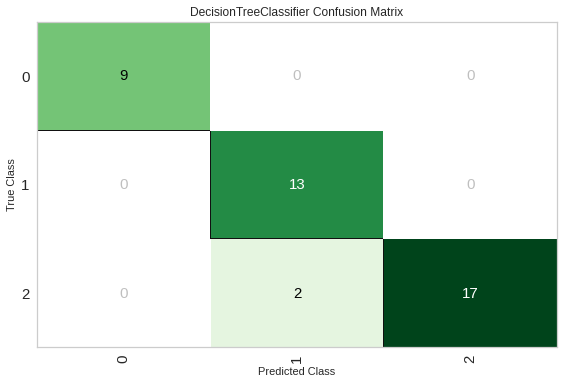

In [ ]:
plot_model(ajuste_arvore, plot= 'confusion_matrix')

Matriz de Confusão da Regressão Linear

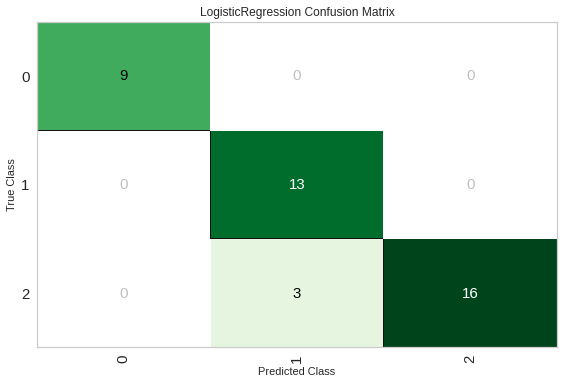

In [ ]:
plot_model(ajuste_regressao, plot= 'confusion_matrix')

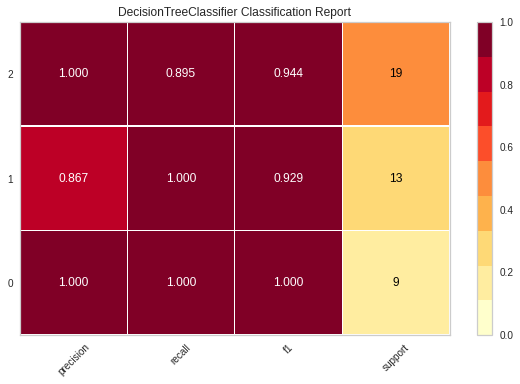

In [ ]:
plot_model(ajuste_arvore, plot = 'class_report')

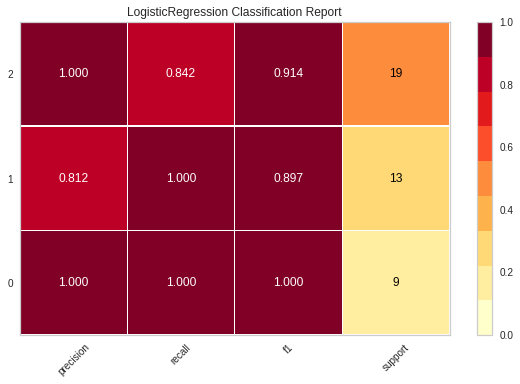

In [ ]:
plot_model(ajuste_regressao, plot = 'class_report')

Gráfico de limite de decisão

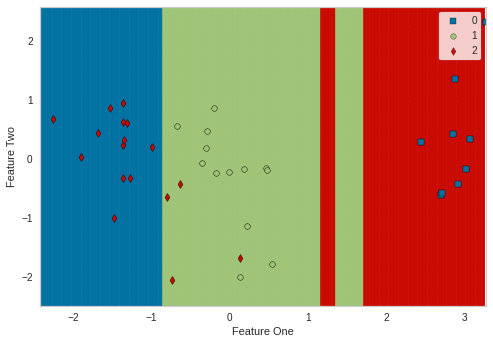

In [ ]:
plot_model(ajuste_arvore, plot='boundary')

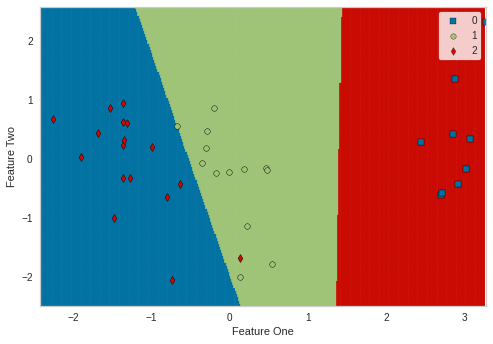

In [ ]:
plot_model(ajuste_regressao, plot='boundary')

Gráfico de erro de previsão

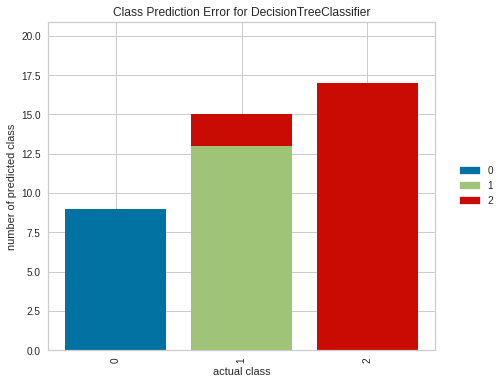

In [ ]:
plot_model(ajuste_arvore, plot = 'error')

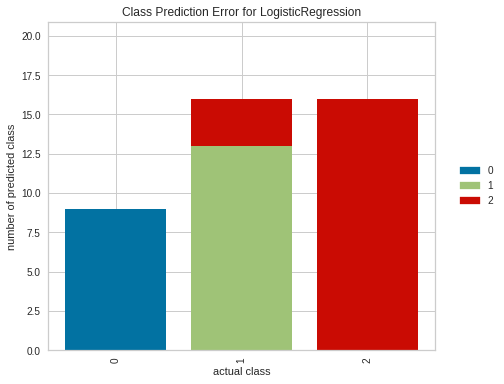

In [ ]:
plot_model(ajuste_regressao, plot = 'error')

Outra maneira de analisar o desempenho dos modelos é usar a função **evaluate_model()** que exibe uma interface de usuário para todos os gráficos disponíveis para um determinado modelo. Ele usa internamente a função **plot_model()**.

In [ ]:
evaluate_model(ajuste_arvore)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Prever na amostra de teste


---

**ESTE ÍTEM PRECISA EDITAR PARA A COMPARAÇÃO DE RESULTADOS!**

---


Antes de finalizar o modelo, é aconselhável realizar uma verificação final, prevendo o conjunto de teste / retenção e revisando as métricas de avaliação. Se você olhar a grade de informações acima, verá que **30% (41 amostras)** dos dados foram separados como uma amostra de teste / validação. Todas as métricas de avaliação que vimos acima são resultados de validação cruzada com base no conjunto de treinamento **(70%)** apenas. Agora, usando nosso modelo final treinado armazenado na variável **ajuste_arvore**, faremos uma previsão em relação à amostra de validação e avaliaremos as métricas para ver se elas são materialmente diferentes dos resultados de CV.

In [ ]:
predict_model(ajuste_arvore)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.9512,0.9643,0.9649,0.9577,0.9516,0.9242,0.9277


,sepal_length,sepal_width,petal_length,petal_width,species,Label,Score
0,6.0,2.2,5.0,1.5,Iris-virginica,Iris-versicolor,1.0000
1,5.5,2.3,4.0,1.3,Iris-versicolor,Iris-versicolor,1.0000
2,6.2,2.9,4.3,1.3,Iris-versicolor,Iris-versicolor,1.0000
3,6.3,3.3,4.7,1.6,Iris-versicolor,Iris-versicolor,1.0000
4,6.5,3.0,5.8,2.2,Iris-virginica,Iris-virginica,1.0000
5,4.8,3.4,1.9,0.2,Iris-setosa,Iris-setosa,1.0000
6,6.2,2.8,4.8,1.8,Iris-virginica,Iris-virginica,0.8333
7,5.6,3.0,4.5,1.5,Iris-versicolor,Iris-versicolor,1.0000
8,6.9,3.1,5.4,2.1,Iris-virginica,Iris-virginica,1.0000
9,4.6,3.2,1.4,0.2,Iris-setosa,Iris-setosa,1.0000


A precisão no conjunto de teste/resistência é de 0,9512 em comparação com 0,9356 alcançada nos resultados de CV tuned_knn (na seção 9.2 acima). Esta não é uma diferença significativa. Se houver uma grande variação entre os resultados do teste / resistência e CV, isso normalmente indicaria um sobreajuste, mas também poderia ser devido a vários outros fatores e exigiria uma investigação mais detalhada. Nesse caso, avançaremos com a finalização do modelo e a previsão de dados não vistos (os 10% que separamos no início e nunca expusemos ao PyCaret).

## Finalizar modelo para implantação

A finalização do modelo é a última etapa do experimento. Um fluxo de trabalho normal de aprendizado de máquina no PyCaret começa com **setup()**, seguido pela comparação de todos os modelos usando **compare_models()** e listando alguns modelos candidatos (com base na métrica de interesse) para realizar várias técnicas de modelagem, como ajuste de hiperparâmetros, agrupamento, empilhamento etc. . Este fluxo de trabalho acabará por levá-lo ao melhor modelo para uso ao fazer previsões sobre dados novos e não vistos. A função **finalize_model()** ajusta o modelo ao conjunto de dados completo, incluindo a amostra de teste / validação (30% neste caso). O objetivo desta função é treinar o modelo no conjunto de dados completo antes de ser implantado na produção.

In [ ]:
final_arvore = finalize_model(ajuste_arvore)

In [ ]:
#Parametros finais para Implantação da Árvore de Decisão
print(final_arvore)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.001, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')


## Preveja dados não vistos

A função **predict_model()** também é usada para prever no conjunto de dados invisível. A única diferença da seção acima é que desta vez passaremos o parâmetro **base_teste**. **base_teste** é a variável criada no início do tutorial e contém 10% (15 amostras) do conjunto de dados original que nunca foi exposto ao PyCaret.

In [ ]:
novas_previsoes = predict_model(final_arvore, data=base_teste)
novas_previsoes.head()

,sepal_length,sepal_width,petal_length,petal_width,species,Label,Score
20,5.4,3.4,1.7,0.2,Iris-setosa,Iris-setosa,1.0000
25,5.0,3.0,1.6,0.2,Iris-setosa,Iris-setosa,1.0000
37,4.9,3.1,1.5,0.1,Iris-setosa,Iris-setosa,1.0000
50,7.0,3.2,4.7,1.4,Iris-versicolor,Iris-versicolor,1.0000
68,6.2,2.2,4.5,1.5,Iris-versicolor,Iris-versicolor,0.8333


As colunas Label e Score são adicionadas ao conjunto base_teste. Label é a previsão e Score é a probabilidade da previsão. Observe que os resultados previstos são concatenados ao conjunto de dados original, enquanto todas as transformações são executadas automaticamente em segundo plano.

## Salvando o modelo

Agora terminamos o experimento finalizando o modelo **ajuste_arvore** que agora está armazenado na variável **final_arvore**. Também usamos o modelo armazenado em **final_arvore** para prever **base_teste**. Isso nos leva ao final de nosso experimento, mas uma pergunta ainda precisa ser feita: o que acontece quando você tem mais dados novos para prever? Você tem que passar por todo o experimento novamente? A resposta é não, a função embutida **save_model()** do PyCaret permite que você salve o modelo junto com o pipeline de transformação inteiro para uso posterior.

In [ ]:
save_model(final_arvore,'Modelo de Rede Árvore de Decisão - 21MAI2021')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='species',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                         criterion='entropy', max_depth=4,
                        

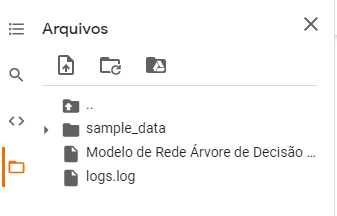

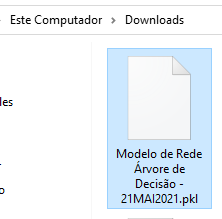

## Carregando um modelo Salvo

Para carregar um modelo salvo em uma data futura no mesmo ambiente ou em um ambiente alternativo, usaríamos a função **load_model()** do PyCaret e então aplicaríamos facilmente o modelo salvo em novos dados não vistos para previsão.

In [ ]:
salvo_final_arvore = load_model('Modelo de Rede Árvore de Decisão - 21MAI2021')

Transformation Pipeline and Model Successfully Loaded


Depois que o modelo é carregado no ambiente, você pode simplesmente usá-lo para prever quaisquer novos dados usando a mesma função **predict_model()**. A seguir, aplicamos o modelo carregado para prever o mesmo **base_teste** que usamos acima.

In [ ]:
outra_previsao = predict_model(salvo_final_arvore, data=base_teste)
outra_previsao.head()

,sepal_length,sepal_width,petal_length,petal_width,species,Label,Score
20,5.4,3.4,1.7,0.2,Iris-setosa,Iris-setosa,1.0000
25,5.0,3.0,1.6,0.2,Iris-setosa,Iris-setosa,1.0000
37,4.9,3.1,1.5,0.1,Iris-setosa,Iris-setosa,1.0000
50,7.0,3.2,4.7,1.4,Iris-versicolor,Iris-versicolor,1.0000
68,6.2,2.2,4.5,1.5,Iris-versicolor,Iris-versicolor,0.8333
